In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Problem 1

In [96]:
df=pd.read_csv("Desktop\\Assignment 2\\problem_1\\train.csv")

In [97]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


In [99]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    466 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


In [101]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [188]:
df_test=pd.read_csv("Desktop\\Assignment 2\\problem_1\\test.csv")

In [190]:
df_test['Albumin_and_Globulin_Ratio'].fillna(df_test['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
df_test['Gender'] = df_test['Gender'].map({'Female': 1, 'Male': 0})
df_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,0,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,0,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,1,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,0,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,0,2.6,1.2,171,42,37,5.4,2.7,1.00


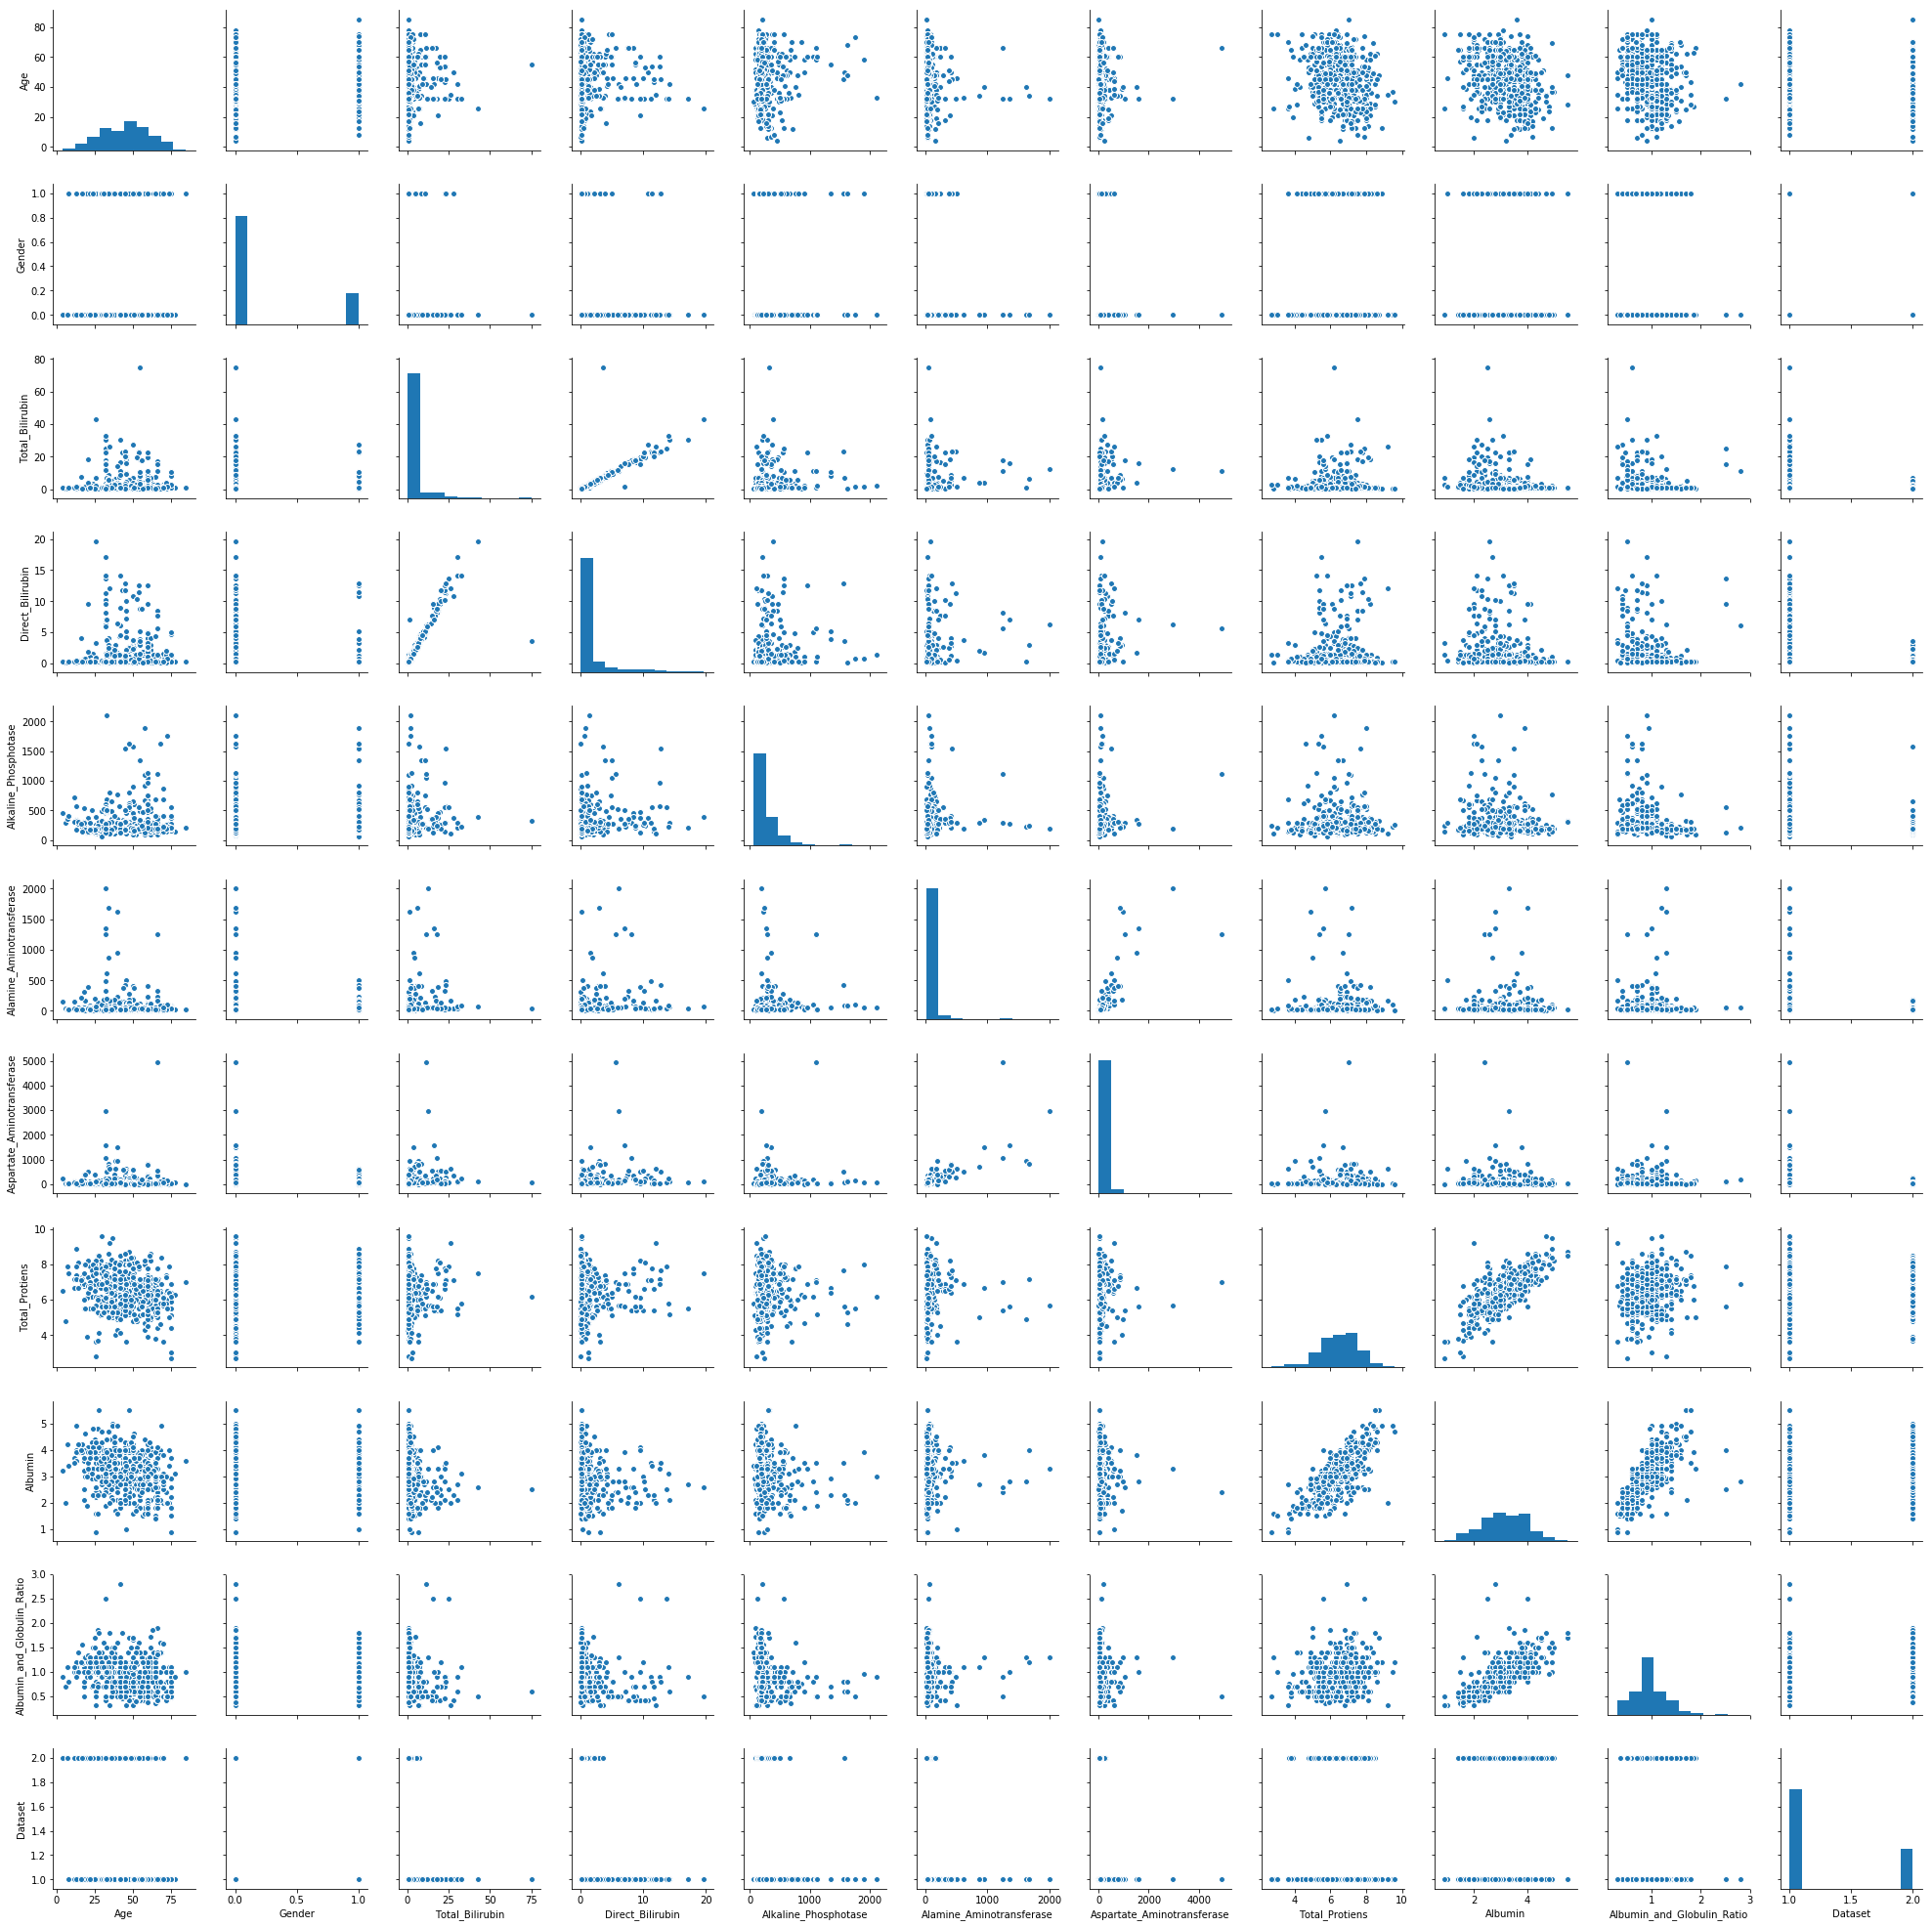

In [102]:
sns.pairplot(df)

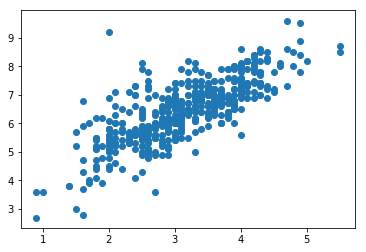

In [104]:
plt.scatter(df['Albumin'],df['Total_Protiens'])

In [160]:
from sklearn.model_selection import train_test_split

In [180]:
#Function to extract the features which provides maximum accuracy
import itertools 
from itertools import combinations, chain 
  
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n))) 
      
feature=list(df.columns)
feature.remove('Dataset')
s = feature
y=df['Dataset']
maximum=0
for i in range(2,11):
    feat=list(findsubsets(s, i))
    for ele in feat:
        logmodel = LogisticRegression()
        X=df[list(ele)]
        X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
        logmodel.fit(X_train,y_train)
        #print(list(logmodel.coef_))
        predictions = logmodel.predict(X_test)
        # print(classification_report(y_test,predictions))
        score=accuracy_score(y_test, predictions)
        if score>maximum:
            maximum=score
            feature_col=ele
print(maximum)
print(feature_col)

0.8034188034188035
{'Aspartate_Aminotransferase', 'Gender', 'Alamine_Aminotransferase', 'Albumin'}


In [195]:
from sklearn.linear_model import LogisticRegression
features=['Aspartate_Aminotransferase', 'Gender', 'Alamine_Aminotransferase', 'Albumin']
X=df[features]
y=df['Dataset']
X_test=df_test[features]
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
#accuracy_score(y_test, predictions)

In [200]:
predict=pd.DataFrame(predictions,columns=['Dataset'])
predict.to_csv("problem_1_predict.csv",index=False)

# Problem 2

In [201]:
dff=pd.read_csv("Desktop\\Assignment 2\\problem_2\\problem_2_train.csv")

In [46]:
dff_test=pd.read_csv("Desktop\\Assignment 2\\problem_2\\problem_2_test.csv")

In [31]:
dff.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [47]:
dff_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 15 columns):
srno                   2116 non-null int64
mobmake                2116 non-null object
hubid                  2116 non-null int64
hubpincode             2116 non-null int64
pickuppartnerid        2116 non-null int64
deliverypartnerid      2116 non-null int64
insuranceCompanyId     2116 non-null int64
custpincodecategory    2116 non-null object
claimtype              2116 non-null object
custpincode            2116 non-null int64
memcreateddate         2116 non-null object
mobilepurchasedate     2116 non-null object
claimintdate           2116 non-null object
servicecntrid          2116 non-null int64
pickupStartdate        2116 non-null object
dtypes: int64(8), object(7)
memory usage: 248.0+ KB


In [33]:
dff.shape

(6250, 16)

In [34]:
dff.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [36]:
dff.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [38]:
dictionary={}
i=1
for ele in dff['mobmake'].unique():
    dictionary[ele]=i
    i+=1
dictionary

{'AN': 1,
 'AJ': 2,
 'AM': 3,
 'C': 4,
 'AI': 5,
 'AD': 6,
 'S': 7,
 'AA': 8,
 'Y': 9,
 'AE': 10,
 'D': 11,
 'U': 12,
 'AB': 13,
 'T': 14,
 'AF': 15,
 'G': 16,
 'L': 17,
 'H': 18,
 'K': 19,
 'J': 20,
 'N': 21,
 'AP': 22,
 'AK': 23,
 'O': 24,
 'F': 25,
 'AL': 26,
 'R': 27,
 'M': 28,
 'Z': 29,
 'P': 30,
 'I': 31,
 'V': 32,
 'AR': 33,
 'W': 34,
 'AG': 35,
 'B': 36,
 'A': 37,
 'AO': 38}

In [39]:
dff['mobmake']=dff['mobmake'].map(dictionary)
dff['custpincodecategory']=dff['custpincodecategory'].map({'A':1,'B':2,'C':3,'D':4,'0':0})
dff['claimtype']=dff['claimtype'].map({'ADLD':1,'EW':2})
dff['memcreateddate']=pd.to_datetime(dff.memcreateddate)
dff['mobilepurchasedate']=pd.to_datetime(dff.mobilepurchasedate)
dff['claimintdate']=pd.to_datetime(dff.claimintdate)
dff['pickupStartdate']=pd.to_datetime(dff.pickupStartdate)
dff['memcreateddate']=dff.memcreateddate.dt.month
dff['mobilepurchasedate']=dff.mobilepurchasedate.dt.month
dff['claimintdate']=dff.claimintdate.dt.month
dff['pickupStartdate']=dff.pickupStartdate.dt.month

In [48]:
dff_test['mobmake']=dff_test['mobmake'].map(dictionary)
dff_test['custpincodecategory']=dff_test['custpincodecategory'].map({'A':1,'B':2,'C':3,'D':4,'0':0})
dff_test['claimtype']=dff_test['claimtype'].map({'ADLD':1,'EW':2})
dff_test['memcreateddate']=pd.to_datetime(dff_test.memcreateddate)
dff_test['mobilepurchasedate']=pd.to_datetime(dff_test.mobilepurchasedate)
dff_test['claimintdate']=pd.to_datetime(dff_test.claimintdate)
dff_test['pickupStartdate']=pd.to_datetime(dff_test.pickupStartdate)
dff_test['memcreateddate']=dff_test.memcreateddate.dt.month
dff_test['mobilepurchasedate']=dff_test.mobilepurchasedate.dt.month
dff_test['claimintdate']=dff_test.claimintdate.dt.month
dff_test['pickupStartdate']=dff_test.pickupStartdate.dt.month

In [42]:
dff2=pd.read_csv("Desktop\\Assignment 2\\problem_2\\problem_2_test.csv")
a=dff2.mobmake.unique()
a

array(['AN', 'AJ', 'C', 'U', 'J', 'H', 'AD', 'AF', 'AI', 'D', 'S', 'AE',
       'AM', 'Y', 'AA', 'AB', 'G', 'F', 'Z', 'L', 'R', 'A', 'AH', 'AK',
       'O', 'Q', 'K', 'W', 'I', 'AC', 'T', 'AR', 'P', 'AG'], dtype=object)

In [43]:
dff1=pd.read_csv("Desktop\\Assignment 2\\problem_2\\problem_2_train.csv")
b=dff1.mobmake.unique()
b

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [65]:
#feature_cols=['hubid','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','memcreateddate','mobilepurchasedate','claimintdate']
feature_cols=list(dff.columns)
feature_cols.remove('tat_in_days')
X=dff[feature_cols]
y=dff['tat_in_days']
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(dff_test)
#plt.scatter(y_test,y_pred)
#from sklearn.metrics import mean_squared_error
#np.sqrt(mean_squared_error(y_pred,y_test))
#sns.distplot(y_test-y_pred)

In [ ]:
list(zip(feature_cols,linreg.coef_))

In [538]:
len(feature_cols)

15

In [64]:
dff_test.fillna(0,inplace=True)
dff_test.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
dtype: int64

C:\Users\KAJUL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


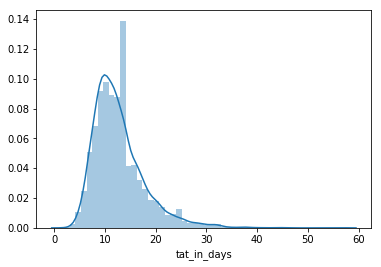

In [4]:
sns.distplot(dff['tat_in_days'])

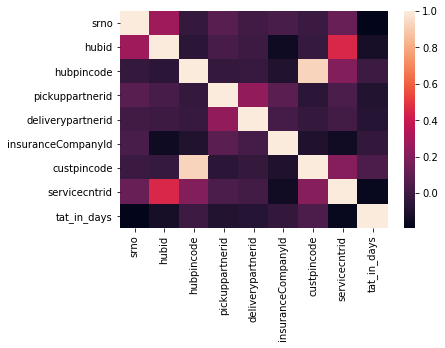

In [6]:
sns.heatmap(dff.corr())

In [82]:
import math

In [90]:
pred=list(map(math.ceil,y_pred))

In [94]:
predict=pd.DataFrame(pred,columns=["tat_in_days"])

In [95]:
predict.to_csv("problem_2_predict.csv",index=False)